# Pandas
- 판다스는 강력한 데이터 구조를 사용하여 고성능 데이터 조작 및 데이터 분석에 사용되는 오픈 소스 파이썬 라이브러리다.
    - Series
    - DataFrame

In [1]:
import pandas as pd

### Series
- 1차원적인 배열. 가장 기본적인 방법은 파이썬의 리스트에서 생성하는 것
- 엑셀 시트의 열 하나와 같다.
- 행이 존재(index), column은 존재하지 않음

In [33]:
# 리스트로 Series생성

list_data = [1, 2, 3]
pd.Series(list_data, index=['AAAA', 'BBBB', 'CCCC'])   # index 변경하기

AAAA    1
BBBB    2
CCCC    3
dtype: int64

In [31]:
# 딕셔너리로 Series생성

dict_data = {'a': 1, 'b': 2, 'c': 3}
pd.Series(dict_data)

a    1
b    2
c    3
dtype: int64

In [34]:
# 튜플로 Series생성

tuple_data = ('2021', '2022', '2023')
pd.Series(tuple_data, index=['재작년', '작년', '올해'])

재작년    2021
작년     2022
올해     2023
dtype: object

### 인덱싱

- iloc(integer location) : 행, 열 기준으로 인덱싱

- loc(location) : 인덱스 인덱싱

In [36]:
data = [100, 200, 300, 400]
seriesA = pd.Series(data)

In [42]:
print('seriesA.iloc[0]: ', seriesA.iloc[0])
print('seriesA.iloc[1]: ', seriesA.iloc[1])
print('seriesA.loc[0]: ', seriesA.loc[0])
print('seriesA.loc[2]: ', seriesA.loc[2])

seriesA.iloc[0]:  100
seriesA.iloc[1]:  200
seriesA.loc[0]:  100
seriesA.loc[2]:  300


In [43]:
data = [100, 200, 300, 400]
index = ['A', 'B', 'C', 'D']

seriesB = pd.Series(data, index=index)
print(seriesB)

A    100
B    200
C    300
D    400
dtype: int64


In [45]:
seriesB.iloc[0]

100

In [46]:
seriesB.loc['A']

100

### 슬라이싱

In [47]:
data = [100, 200, 300, 400]
index = ['A', 'B', 'C', 'D']

seriesC = pd.Series(data, index=index)
print(seriesC)

A    100
B    200
C    300
D    400
dtype: int64


In [54]:
seriesC.iloc[:2]

A    100
B    200
dtype: int64

In [55]:
seriesC.loc[:'B']

A    100
B    200
dtype: int64

In [58]:
seriesC.iloc[[0, 2]]

A    100
C    300
dtype: int64

In [59]:
seriesC.loc[['A', 'C']]

A    100
C    300
dtype: int64

In [ ]:
# 데이터 추가, 수정, 삭제

In [60]:
seriesC

A    100
B    200
C    300
D    400
dtype: int64

In [63]:
seriesC['B'] = 500
seriesC

A    100
B    500
C    300
D    400
dtype: int64

In [65]:
seriesC.iloc[3] = 200
seriesC

A    100
B    500
C    300
D    200
E    200
dtype: int64

In [64]:
seriesC['E'] = 200
seriesC

A    100
B    500
C    300
D    400
E    200
dtype: int64

In [71]:
seriesC.loc['F'] = 250
seriesC

A    100
B    500
C    300
D    200
E    200
f    250
F    250
dtype: int64

In [75]:
seriesD = seriesC.drop('f')
seriesD

A    100
B    500
C    300
D    200
E    200
F    250
dtype: int64

In [76]:
seriesD.drop('F')

A    100
B    500
C    300
D    200
E    200
dtype: int64

In [ ]:
# Series 연산

In [80]:
students = ['철수', '영희', '민수']
mid_grades = [90, 98, 100]
final_grades = [49, 92, 75]

mid_series = pd.Series(mid_grades, index = students)
final_series = pd.Series(final_grades, index = students)

In [83]:
mid_series, final_series

(철수     90
 영희     98
 민수    100
 dtype: int64,
 철수    49
 영희    92
 민수    75
 dtype: int64)

In [85]:
# 학생별 점수의 총합

all_series = mid_series + final_series
all_series

철수    139
영희    190
민수    175
dtype: int64

In [86]:
# 학생별 중간 점수와 기말 점수의 차이

diff_series = final_series - mid_series
diff_series

철수   -41
영희    -6
민수   -25
dtype: int64

In [89]:
# unique 사용 예제

sports_user = {
    '손흥민': '축구선수',
    '김연아': '피겨선수',
    '서장훈': '농구선수',
    '박지성': '축구선수',
    '황희찬': '축구선수',
    '류현진': '야구선수',
    '박찬호': '야구선수',
    '김병현': '야구선수'
}

series = pd.Series(sports_user)
series

손흥민    축구선수
김연아    피겨선수
서장훈    농구선수
박지성    축구선수
황희찬    축구선수
류현진    야구선수
박찬호    야구선수
김병현    야구선수
dtype: object

In [93]:
series.unique()     # 유니크한 값들을 리스트 형태로 추출

array(['축구선수', '피겨선수', '농구선수', '야구선수'], dtype=object)

In [94]:
series.value_counts()    # 유니크한 값들에 대해서 갯수(빈도 수) 반환

축구선수    3
야구선수    3
피겨선수    1
농구선수    1
dtype: int64

In [99]:
series = pd.Series([11, 23, 41])

def divide(x):
    return x/2

# new_series = series / 2
new_series = series.map(divide)    # map 안에는 함수가 들어감
new_series

0     5.5
1    11.5
2    20.5
dtype: float64

In [101]:
series = pd.Series(['철수', '영희', '민지'])

def greet(name):
    return name + '안녕'

new_series = series.map(greet)
new_series

0    철수안녕
1    영희안녕
2    민지안녕
dtype: object

In [104]:
series = pd.Series(['$21.02', '$23.11', '$192.34'])

def remove(x):
    return float(x.replace('$', ''))

new_series = series.map(remove)
new_series

0     21.02
1     23.11
2    192.34
dtype: float64

In [105]:
# filtering

series = pd.Series([10000, 12000, 13000, 12500, 15000])
series[series > 12500]

2    13000
4    15000
dtype: int64

In [120]:
# sort

series = pd.Series([1.2, 2.1, 5.8, 1.7, 4.3])

# series.sort_values() 오름차순
series.sort_values(ascending=False).reset_index(drop=True)      # 내림차순으로 정렬

0    5.8
1    4.3
2    2.1
3    1.7
4    1.2
dtype: float64

### DataFrame
- 데이터 프레임은 행과 열에 이름이 붙여진 2차원 배열

In [121]:
import numpy as np

In [130]:
data = np.arange(1, 5).reshape(2, -1)
data

array([[1, 2],
       [3, 4]])

In [134]:
df = pd.DataFrame(data, index = ['A', 'B'], columns = ['C', 'D'])
df

,C,D
A,1,2
B,3,4


In [136]:
data2 = np.arange(5, 9).reshape(2, -1)
df2 = pd.DataFrame(data2, index = ['A', 'B'], columns = ['C', 'D'])
df2

,C,D
A,5,6
B,7,8


In [141]:
df + df2

,C,D
A,6,8
B,10,12


In [143]:
import matplotlib.pyplot as plt

In [157]:
titanic = pd.read_csv('2306_newdeal_main_자료_판다스_titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [161]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [160]:
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [162]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [163]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [164]:
titanic.shape

(891, 12)

In [165]:
titanic.describe()   # 각 열(숫자 타입 한정)에 대해서 통계량 표현  *문자열을 처리하지 않음

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.834734,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.633076,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,92.000000,8.000000,6.000000,512.329200


In [171]:
# 3번째 행, 5번째열 슬라이싱

titanic.iloc[2, 4]

'female'

In [172]:
# dtype (데이터의 형태 확인)

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [180]:
# 수치형 데이터들만 추출해서 새로운 데이터 프레임 생성

new_titanic = titanic.select_dtypes(exclude='object')          # 문자열 데이터 제외
new_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [181]:
new_titanic2 = new_titanic.select_dtypes(include='int64')                    # 정수형만 데이터에 포함
new_titanic2.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
SibSp          int64
Parch          int64
dtype: object

In [187]:
# 결측치 확인

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [193]:
# 결측치 값 대체

titanic['Embarked'].unique()

titanic.loc[titanic['Embarked'].isna(), 'Embarked'] = 'S'   # 'Embarked'의 NaN인 조건에 해당하는 데이터들 중 'Embarked'에 해당하는 데이터를 'S'로 대체

In [196]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [201]:
# 'Age'컬럼 데이터 float64 -> 나이는 실수형이 존재하지 않으므로 정수형으로 바꿔주려 함

titanic['Age'].fillna(-1).astype('int64').replace({-1: None})

0        22
1        38
2        26
3        35
4        35
       ... 
886      27
887      19
888    None
889      26
890      32
Name: Age, Length: 891, dtype: object

In [205]:
# 운임요금(달러)->운임요금(원화) 컬럼 생성

titanic.loc[:, 'FareWon'] = titanic['Fare'] *1389.2
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareWon
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,10071.70000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,99026.76036
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,11009.41000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,73766.52000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,11183.06000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,18059.60000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,41676.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,32576.74000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,41676.00000


In [214]:
titanic['FareWon'] = 'W' + (titanic['Fare']*1389.2).astype('string')

titanic[['FareWon']]

,FareWon
0,W10071.7
1,W99026.76036
2,W11009.41
3,W73766.52
4,W11183.060000000001
...,...
886,W18059.600000000002
887,W41676.0
888,W32576.74
889,W41676.0


In [216]:
# 그룹핑

titanic['Age'].mean()
titanic['Age'].max()
titanic['Age'].min()
titanic['Age'].median()

28.0

In [221]:
# 성별에 따른 나이의 평균값

titanic[['Age']].groupby(titanic['Sex']).mean()

,Age
Sex,
female,27.915709
male,30.940397


In [225]:
# 탑승 등급, 성별, 나이
# 탑승 등급 별, 성별 별 -> 나이 평균

titanic[['Pclass', 'Age', 'Sex']].groupby(['Pclass', 'Sex']).mean()

Age
Pclass Sex              
1      female  34.611765
       male    42.178218
2      female  28.716216
       male    30.828283
3      female  21.754902
       male    26.498024

In [228]:
# 탑승 등급, 성별에 따른 인원 수(value_counts())

titanic[['Pclass', 'Sex']].groupby(['Pclass', 'Sex']).value_counts()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [233]:
# 탑승 등급에 따른 남여의 생존자 수

titanic[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).sum()

Survived
Pclass Sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47

In [249]:
# 논리적 인덱싱
# 20살 미만의 승객의 이름과 나이

titanic_S = titanic.loc[(titanic['Age'] < 20) & (titanic['Embarked'] == 'S'), ['Name', 'Age']]
titanic_S

,Name,Age
7,"Palsson, Master. Gosta Leonard",2.0
10,"Sandstrom, Miss. Marguerite Rut",4.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",14.0
24,"Palsson, Miss. Torborg Danira",8.0
27,"Fortune, Mr. Charles Alexander",19.0
...,...,...
853,"Lines, Miss. Mary Conover",16.0
855,"Aks, Mrs. Sam (Leah Rosen)",18.0
869,"Johnson, Master. Harold Theodor",4.0
877,"Petroff, Mr. Nedelio",19.0


In [252]:
titanic_S.sort_values(by='Age').reset_index(drop=True)

,Name,Age
0,"Panula, Master. Eino Viljami",1.0
1,"Dean, Master. Bertram Vere",1.0
2,"Becker, Master. Richard F",1.0
3,"Goodwin, Master. Sidney Leonard",1.0
4,"Johnson, Miss. Eleanor Ileen",1.0
...,...,...
119,"Patchett, Mr. George",19.0
120,"Cor, Mr. Liudevit",19.0
121,"Dakic, Mr. Branko",19.0
122,"Johnson, Mr. William Cahoone Jr",19.0


In [254]:
df = pd.DataFrame({'Name' : ['Kim', 'Lee', 'Park', 'Choi', 'Hong'],
                  'Age' : [22, 26, 70, 17, 28],
                  'City' : ['Seoul', 'Busan', 'Seoul', 'Daegu', 'Seoul'],
                  'Children' : [2, 3, 0, 1, 3],
                  'Pets' : [0, 1, 0, 2, 3]})

df

,Name,Age,City,Children,Pets
0,Kim,22,Seoul,2,0
1,Lee,26,Busan,3,1
2,Park,70,Seoul,0,0
3,Choi,17,Daegu,1,2
4,Hong,28,Seoul,3,3


<AxesSubplot: xlabel='Name'>

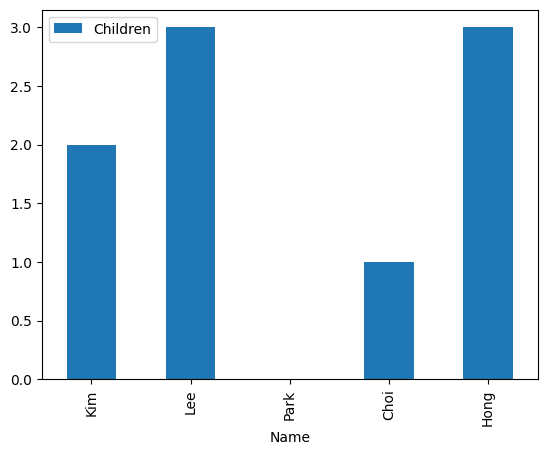

In [255]:
df.plot(kind='bar', x='Name', y='Children')

# 크롤링 

### HTML, DOM 구조
- Web은 대부분 HTML, Javascript, css로 이루어져 있다.

HTML - HyperText Markup Language의 줄임말(확장자.html)
- <태그의 이름>콘텐츠</태그의 이름>
- 웹 페이지의 구조와 내용을 기술하기 위한 마크업 언어
- 웹 브라우저는 HTMl문서를 해석해서 사용자에게 보여주는 역할

DOM - Document Object Model

### Request
- Python 프로그래밍 언어용, HTTP요청을 보낼 수 있도록 기능을 제공하는 라이브러리
- 웹파싱은 웹상의 자연어, 컴퓨터 언어 등의  일련의 문자열들을 분석하는 프로세스

### BeautifulSoup
- 웹페이지의 정보를 쉽게 스크랩할 수 있도록 기능을 제공하는 라이브러리
- 웹스크래핑은 다양한 웹사이트로부터 데이터를 추출하는 기술

### Selenium
- 셀레늄은 웹 앱을 테스트하는데 사용하는 프레임워크
- 웹 앱을 테스트 하는 용도로 개발된